<a href="https://colab.research.google.com/github/peteranagy/adventofcode/blob/master/adventofcode19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import base64
import requests
import math

master = "https://raw.githubusercontent.com/peteranagy/adventofcode/master/day1"
req = requests.get(master)
req = req.text
data=req.split("\n")
data=[int(f) for f in data[:-1]]


DAY1

In [3]:
def day1(a):
  return math.floor(a/3)-2

day1_res=0
for i in data:
  day1_res=day1_res+day1(i)

day1_res

3392373

In [4]:
day1_res2=0
for i in data:
  a=0
  while day1(i)>0:
    a=a+day1(i)
    i=day1(i)
  day1_res2=day1_res2+a

day1_res2

5085699

DAY2

In [5]:
master = "https://raw.githubusercontent.com/peteranagy/adventofcode/master/day2"
req = requests.get(master)
req = req.text
data=req.split(",")
data=[int(f) for f in data]

In [6]:
data[1]=12
data[2]=2
def day2(data):
  for i in range(len(data)):
    if data[0+i*4]==1:
      data[data[3+i*4]]=data[data[1+i*4]]+data[data[2+i*4]]
    elif data[0+i*4]==2:
      data[data[3+i*4]]=data[data[1+i*4]]*data[data[2+i*4]]
    elif data[0+i*4]==99:
      return data[0]

day2(data)

5482655

In [ ]:
data=req.split(",")
data=[int(f) for f in data]
def day2_trial(data,noun,verb):
  data[1]=noun
  data[2]=verb
  return day2(data)

for i in range(99):
  for j in range(99):
    data=req.split(",")
    data=[int(f) for f in data]
    if day2_trial(data,i,j)==19690720:
      print(i*100+j)

4967


DAY 3

In [89]:
master = "https://raw.githubusercontent.com/peteranagy/adventofcode/master/day3"
req = requests.get(master)
req = req.text
data=list(req.split("\n"))[:-1]
first_w=data[0].strip("<").split(",")
second_w=data[1].strip("<").split(",")

In [120]:
datafr=pd.DataFrame(index=range(max(len(first_w),len(second_w))))


def coordinates(first,datafr,name):
  datafr["R%s" %name]=0
  datafr["U%s" %name]=0
  a=1
  for i in first:  
    if i[0]=="R":
      datafr.loc[a,"R%s" %name]=datafr.loc[a-1,"R%s" %name]+int(i[1:])
      datafr.loc[a,"U%s" %name]=datafr.loc[a-1,"U%s" %name]
    elif i[0]=="L":
      datafr.loc[a,"R%s" %name]=datafr.loc[a-1,"R%s" %name]-int(i[1:])
      datafr.loc[a,"U%s" %name]=datafr.loc[a-1,"U%s" %name]
    elif i[0]=="U":
      datafr.loc[a,"U%s" %name]=datafr.loc[a-1,"U%s" %name]+int(i[1:])
      datafr.loc[a,"R%s" %name]=datafr.loc[a-1,"R%s" %name]
    elif i[0]=="D":
      datafr.loc[a,"U%s" %name]=datafr.loc[a-1,"U%s" %name]-int(i[1:])
      datafr.loc[a,"R%s" %name]=datafr.loc[a-1,"R%s" %name]
    a=a+1
  return datafr

datafr=coordinates(first_w, datafr,1)
datafr=coordinates(second_w, datafr,2)

In [121]:
datafr

,R1,U1,R2,U2
0,0.0,0.0,0,0
1,1000.0,0.0,-1004,0
2,1000.0,573.0,-1004,110
3,975.0,573.0,-266,110
4,975.0,1041.0,-266,-273
...,...,...,...,...
297,858.0,-7615.0,-4782,4971
298,858.0,-7667.0,-4782,5681
299,918.0,-7667.0,-4041,5681
300,918.0,-8241.0,-4041,6322


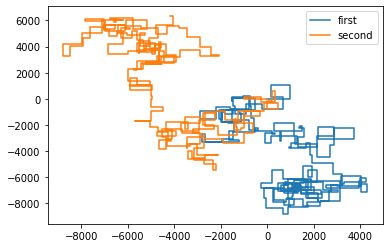

In [238]:
import matplotlib.pyplot as plt
plt.plot(datafr["R1"],datafr["U1"])
plt.plot(datafr["R2"],datafr["U2"])
plt.legend(["first","second"])
plt.show()

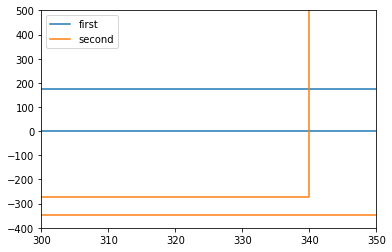

In [239]:
plt.xlim(300,350)
plt.ylim(-400,500)
plt.plot(datafr["R1"],datafr["U1"])
plt.plot(datafr["R2"],datafr["U2"])
plt.legend(["first","second"])
plt.show()

In [240]:
5127+36863

41990